In [1]:
%matplotlib inline

import pandas as pd

from statsmodels.api import OLS, add_constant, graphics
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/btc_1h_train.csv')
df.drop(['open', 'high', 'low', 'close'], axis=1, inplace=True)


In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22164 entries, 0 to 22163
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         22164 non-null  object 
 1   volume           22164 non-null  float64
 2   close_vol        22164 non-null  float64
 3   RSI              22164 non-null  float64
 4   exp_RSI          22164 non-null  float64
 5   bb_high          22164 non-null  float64
 6   bb_low           22164 non-null  float64
 7   atr              22164 non-null  float64
 8   macd             22164 non-null  float64
 9   signal           22164 non-null  float64
 10  macd_signal      22164 non-null  float64
 11  OBV              22164 non-null  float64
 12  EMA              22164 non-null  float64
 13  EMA_Slope        22164 non-null  float64
 14  vwap             22164 non-null  float64
 15  return_1d        22164 non-null  float64
 16  return_4d        22164 non-null  float64
 17  return_12d  

In [4]:
y = df.filter(like = 'target')
X = df.drop(y.columns, axis=1)
X = X.drop('datetime', axis=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X = pd.DataFrame(X_normalized, columns=X.columns)
y = pd.DataFrame(y, columns=y.columns)

In [5]:
corr_mat = X.corr(numeric_only=True).stack().reset_index()
corr_mat.columns=['var1', 'var2', 'corr']
corr_mat = corr_mat[corr_mat.var1!=corr_mat.var2].sort_values(by='corr', ascending=False)

<Axes: >

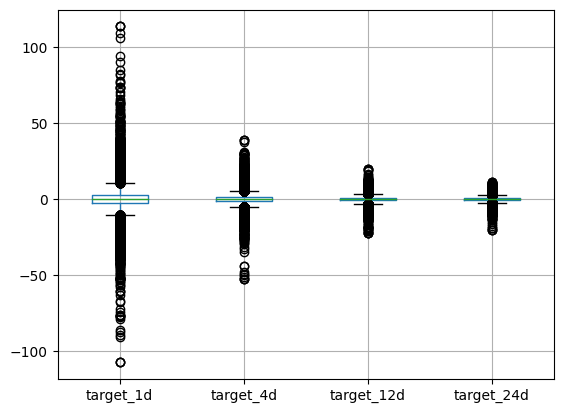

In [6]:
y.boxplot()

In [7]:
correlations = {}
for column in y.columns:
    correlations[column] = X.corrwith(y[column])

correlation_matrix = pd.DataFrame(correlations)


<Axes: title={'center': 'Correlation with target variable'}>

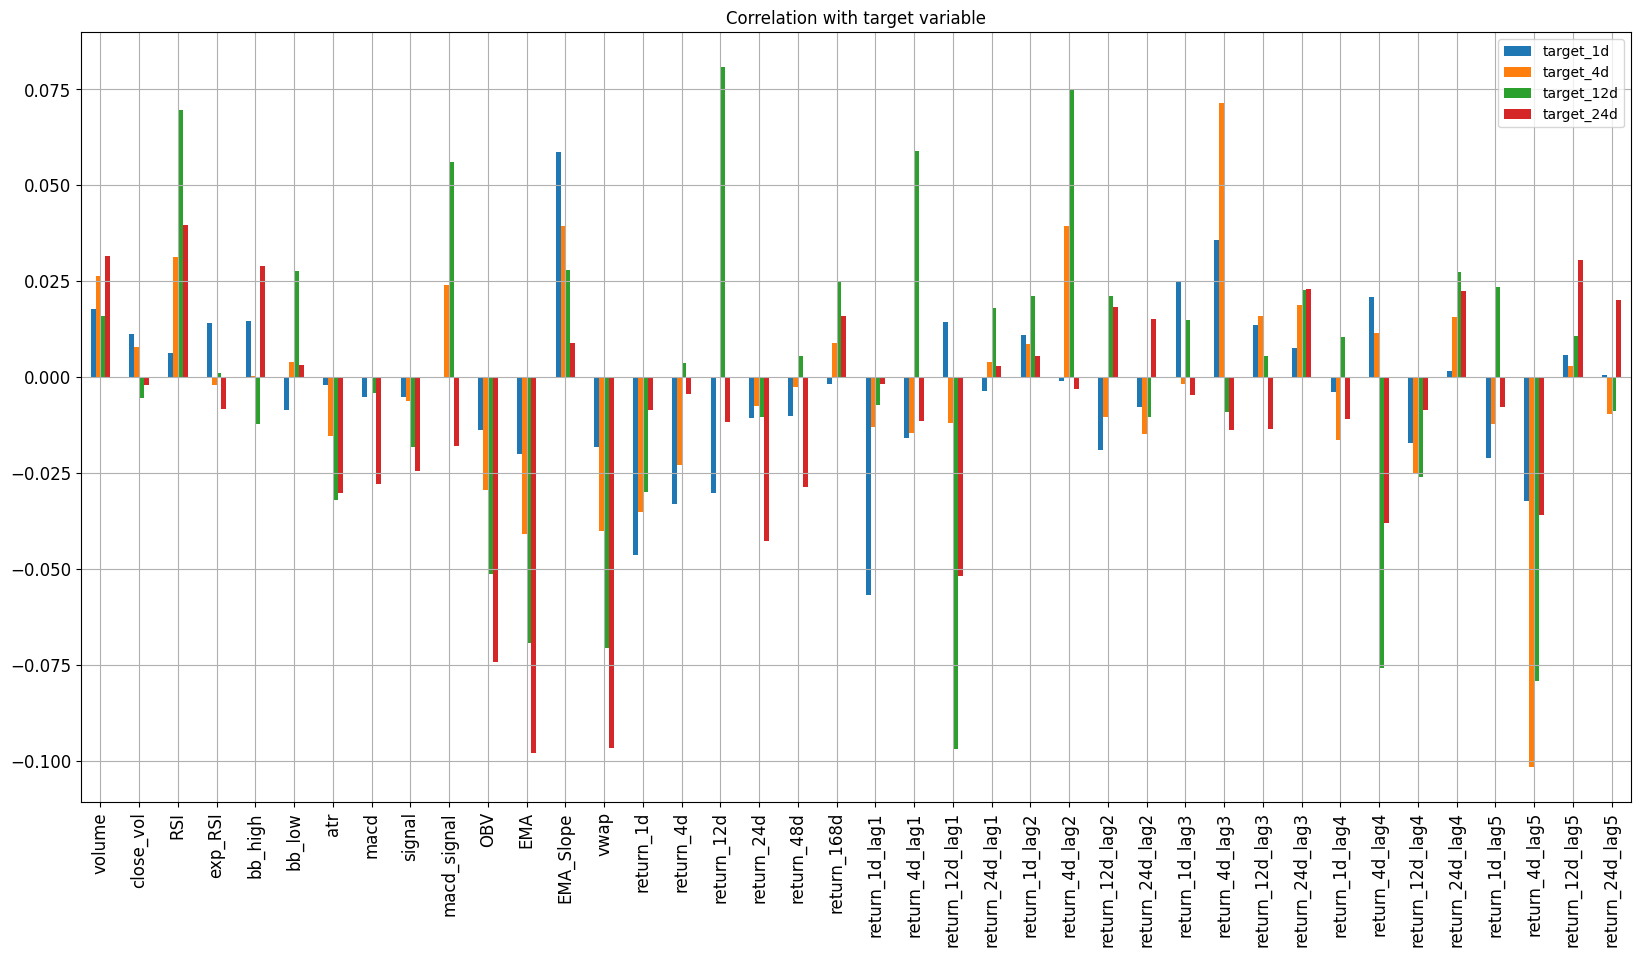

In [8]:
correlation_matrix.plot.bar(figsize=(20, 10), title='Correlation with target variable', grid=True, legend=True, fontsize=12)

In [9]:
target = 'target_4d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:              target_4d   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     21.42
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          5.38e-147
Time:                        17:48:25   Log-Likelihood:                -62461.
No. Observations:               22140   AIC:                         1.250e+05
Df Residuals:                   22100   BIC:                         1.253e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0112      0.027     

In [10]:
%matplotlib inline

from time import time
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [11]:
df = pd.read_csv('data/btc_1h_val.csv')
df.drop(['open', 'high', 'low', 'close'], axis=1, inplace=True)


In [12]:
y_test = df.filter(like = 'target')
X_test = df.drop(y_test.columns, axis=1)
X_test = X_test.drop('datetime', axis=1)
X_test_normalized = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_normalized, columns=X_test.columns)
y_test = pd.DataFrame(y_test, columns=y_test.columns)

In [13]:
model = LinearRegression()
model.fit(X, y['target_4d'])
y_pred = model.predict(X_test)
y_test = y_test['target_4d']

count_greater = ((y_test > 1.5) & (y_pred > 1.5)).sum()
count_less = ((y_test < -1.5) & (y_pred < -1.5)).sum()
total_samples = len(y_test)

percentage_greater = (count_greater / total_samples) * 100
percentage_less = (count_less / total_samples) * 100

print(f"Percentage of times both y_test and y_pred were greater than 1.5: {percentage_greater}%")
print(f"Percentage of times both y_test and y_pred were less than -1.5: {percentage_less}%")


Percentage of times both y_test and y_pred were greater than 1.5: 0.6771697070204533%
Percentage of times both y_test and y_pred were less than -1.5: 15.754560530679933%


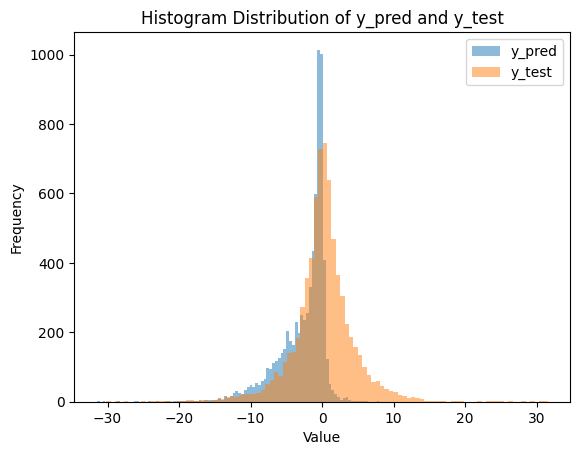

In [14]:
import matplotlib.pyplot as plt

plt.hist(y_pred, bins=100, alpha=0.5, label='y_pred')
plt.hist(y_test, bins=100, alpha=0.5, label='y_test')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of y_pred and y_test')
plt.legend()
plt.show()
